In [9]:
import pandas as pd

df = pd.read_csv('/work/Geographic Factors/crimedata_csv_all_years.csv')
df.sample(5)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
17641,Break and Enter Commercial,2010,8,9,17,0,23XX BAYSWATER ST,Kitsilano,487540.4778,5.456972e+06
548849,Theft from Vehicle,2014,4,16,15,0,26XX LARCH ST,Kitsilano,488181.1463,5.456614e+06
433316,Other Theft,2004,3,24,12,25,83XX CHESTER ST,Sunset,493494.8305,5.450727e+06
633633,Theft from Vehicle,2008,1,7,9,0,7XX E HASTINGS ST,Strathcona,493497.2265,5.458720e+06
723854,Theft of Bicycle,2013,9,27,16,30,CARRALL ST / E PENDER ST,Central Business District,492408.4344,5.458643e+06


In [7]:
df.info()
# 797 566 observations
# some null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797566 entries, 0 to 797565
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           797566 non-null  object 
 1   YEAR           797566 non-null  int64  
 2   MONTH          797566 non-null  int64  
 3   DAY            797566 non-null  int64  
 4   HOUR           797566 non-null  int64  
 5   MINUTE         797566 non-null  int64  
 6   HUNDRED_BLOCK  797554 non-null  object 
 7   NEIGHBOURHOOD  797442 non-null  object 
 8   X              797493 non-null  float64
 9   Y              797493 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 60.8+ MB


In [11]:
N = len(df)
(df.isnull().sum()) / N *100
# small percentage of null on 4 variables

TYPE             0.000000
YEAR             0.000000
MONTH            0.000000
DAY              0.000000
HOUR             0.000000
MINUTE           0.000000
HUNDRED_BLOCK    0.001505
NEIGHBOURHOOD    0.015547
X                0.009153
Y                0.009153
dtype: float64

In [14]:
#df.describe()

In [17]:
categorical = df.select_dtypes('object').columns

print('% of unique values:')
for cat in categorical:
    unique = df[cat].nunique()
    unique = round(unique/N*100,2)
    print(cat, unique)
# no significant cardinality in categoricals

% of unique values:
TYPE 0.0
HUNDRED_BLOCK 2.88
NEIGHBOURHOOD 0.0


In [18]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


In [44]:
type = df.TYPE.value_counts()
type_perc = round((type/N)*100 ,2)
type_perc
# 1/4 of crime are vehicle thefts,
# another 1/4 are other forms of thefts
# major personal injuries such are offense against a person and 
#    homicide comprise <10%

Theft from Vehicle                                        28.27
Other Theft                                               24.26
Mischief                                                  11.73
Break and Enter Residential/Other                          8.73
Offence Against a Person                                   8.51
Break and Enter Commercial                                 5.43
Theft of Vehicle                                           5.38
Theft of Bicycle                                           4.26
Vehicle Collision or Pedestrian Struck (with Injury)       3.36
Vehicle Collision or Pedestrian Struck (with Fatality)     0.04
Homicide                                                   0.04
Name: TYPE, dtype: float64

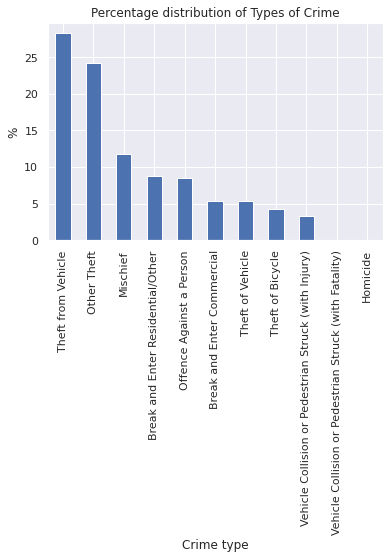

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
type_perc.plot(kind='bar', rot = 90)
plt.xlabel('Crime type')
plt.ylabel('%')
plt.title('Percentage distribution of Types of Crime');

In [54]:
neigh = df.NEIGHBOURHOOD.value_counts()
neigh_perc = round((neigh/N)*100 ,2)
neigh_perc
## with minimal null, not yet filled
# 1/4 of crimes occur in the CBD

Central Business District    26.48
West End                      9.03
Strathcona                    6.32
Mount Pleasant                6.27
Fairview                      6.25
Grandview-Woodland            5.70
Renfrew-Collingwood           5.23
Kitsilano                     5.02
Kensington-Cedar Cottage      4.78
Hastings-Sunrise              3.51
Sunset                        3.28
Marpole                       2.49
Riley Park                    2.44
Victoria-Fraserview           2.03
Killarney                     1.91
Oakridge                      1.55
Dunbar-Southlands             1.33
Kerrisdale                    1.33
West Point Grey               1.13
Arbutus Ridge                 1.09
South Cambie                  1.01
Shaughnessy                   1.00
Stanley Park                  0.67
Musqueam                      0.12
Name: NEIGHBOURHOOD, dtype: float64

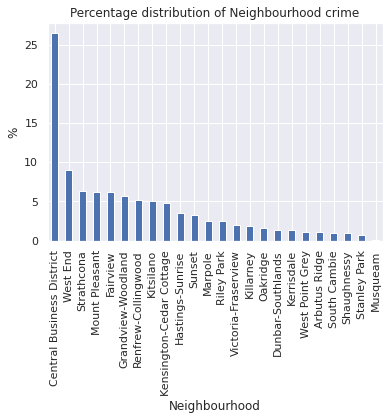

In [58]:
neigh_perc.plot(kind='bar', rot = 90)
plt.xlabel('Neighbourhood')
plt.ylabel('%')
plt.title('Percentage distribution of Neighbourhood crime');

In [39]:
type_neigh = df.groupby('TYPE')['NEIGHBOURHOOD'].value_counts()
(((type_neigh.sort_values(ascending=False))/N)*100).head()
# the leading crimes are thefts and mischief that occur in the CBD, 
#    accounting for almost 20%

# https://geodash.vpd.ca/opendata/
# Other Theft: Theft of property that includes personal items (purse, wallet, cellphone, laptop, etc.), bicycle, etc.

TYPE                NEIGHBOURHOOD            
Other Theft         Central Business District    8.538478
Theft from Vehicle  Central Business District    8.229664
Mischief            Central Business District    3.012791
Theft from Vehicle  West End                     2.730808
Other Theft         West End                     2.551764
Name: NEIGHBOURHOOD, dtype: float64

In [59]:
year = df.YEAR.value_counts()
year_perc = ((year/N)*100).sort_index(ascending=False)
year_perc

2021    1.839095
2020    4.697668
2019    6.054546
2018    5.571577
2017    5.423376
2016    5.535717
2015    5.050742
2014    4.924107
2013    4.496305
2012    4.461700
2011    4.319016
2010    4.473862
2009    4.761111
2008    5.232921
2007    5.566310
2006    6.225692
2005    6.700010
2004    7.289177
2003    7.377070
Name: YEAR, dtype: float64

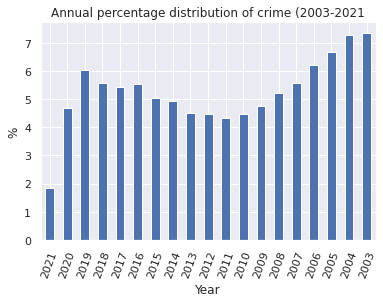

In [62]:
year_perc.plot(kind='bar', rot = 70)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Annual percentage distribution of crime (2003-2021');
# decreasing percentage from 2003 - 2012
# increasing trend 2013-2019
# decreased in 2020 --> ? pandemic effect
# 2021 ongoing

In [65]:
year_type = df.groupby('YEAR')['TYPE'].value_counts()
(((year_type.sort_values(ascending=False))/N)*100).head()

YEAR  TYPE              
2004  Theft from Vehicle    2.282820
2003  Theft from Vehicle    2.224769
2019  Theft from Vehicle    2.132990
2005  Theft from Vehicle    2.075816
2018  Theft from Vehicle    1.881224
Name: TYPE, dtype: float64

In [78]:
veh = df[df.TYPE == 'Theft from Vehicle']
veh.groupby('YEAR')['NEIGHBOURHOOD'].value_counts().sort_values(ascending=False).head(10)

YEAR  NEIGHBOURHOOD            
2019  Central Business District    6375
2003  Central Business District    5340
2018  Central Business District    5300
2004  Central Business District    4419
2016  Central Business District    4384
2017  Central Business District    4313
2006  Central Business District    4084
2007  Central Business District    3869
2008  Central Business District    3831
2005  Central Business District    3780
Name: NEIGHBOURHOOD, dtype: int64

In [110]:
yr_2021 = df[df.YEAR==2021]
cbd = df[df.NEIGHBOURHOOD == 'Central Business District']

yr_2021_cbd = yr_2021[yr_2021.NEIGHBOURHOOD == 'Central Business District']

yr_2021_cbd_type = yr_2021_cbd.groupby('TYPE')
yr_2021_cbd_type_ct = yr_2021_cbd_type.count()
yr_2021_cbd_type_ct['YEAR'].sort_values(ascending=False)

TYPE
Other Theft                                             1062
Mischief                                                 856
Theft from Vehicle                                       772
Offence Against a Person                                 565
Break and Enter Commercial                               319
Theft of Bicycle                                         128
Break and Enter Residential/Other                         59
Vehicle Collision or Pedestrian Struck (with Injury)      58
Theft of Vehicle                                          37
Homicide                                                   4
Name: YEAR, dtype: int64

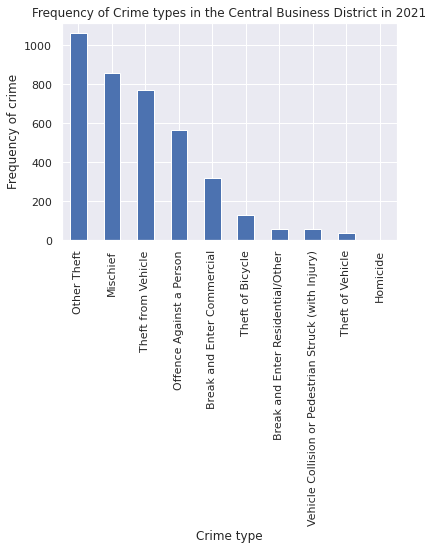

In [114]:
(yr_2021_cbd_type_ct['YEAR'].sort_values(ascending=False)).plot(kind='bar')
plt.xlabel('Crime type')
plt.ylabel('Frequency of crime')
plt.title('Frequency of Crime types in the Central Business District in 2021');

In [117]:
df2 = pd.read_csv('/work/Amenity_Rooms_and_Assets.csv')
df2.sample(5)

## would have helped to have neighbourhood name info, to correlate with statcan

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Bike Storage,Location,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
19,79,COLLINGWOOD TOWER,CT,5657 Harold St.,V5R 5V6,"Bachelor (56), 1BDR (12)",1977.0,Seniors,True,False,...,NaN,NaN,220.0,772.00,494.75,475.00,NaN,NaN,NaN,NaN
17,72,BRIDGEVIEW PLACE,BVP,238 Davie St.,V6B 5X8,"1BDR (56), 2BDR (12), Handicap (4)",1993.0,"Families, People with Disabilities, Seniors",True,False,...,Y,Door left of entrance,320.0,"1,284.00",623.78,529.00,NaN,NaN,NaN,NaN
2,16,BURRARD MANOR,BM,2330 Balsam St,V6K 3M8,"Bachelor (15), 1BDR (1)",1967.0,Seniors,False,False,...,NaN,NaN,475.0,"1,084.00",747.69,787.50,NaN,NaN,NaN,NaN
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,...,Y,Parkade,475.0,"1,553.00",886.10,803.00,NaN,NaN,NaN,NaN
15,25,SOROPTIMIST LIONS,SL,1444 E. 13th Ave.,V5N 2B6,"Bachelor (19), 1BDR (6)",1971.0,Seniors,False,False,...,Y,Rear Parking Shed,475.0,"1,150.00",753.12,772.00,NaN,NaN,NaN,NaN


In [182]:
df2['neighbourhood'] = df2['Postal Code']
df2.neighbourhood.replace({'V5R 5C6': 'Renfrew-Collingwood',
                            'V5Z 1B3' : 'Fairview',
                            'V6G 1K1' :  'Stanley Park',
                            'V6K 1L9': 'Kitsilano',
                            'V5T 1J9': 'Mount Pleasant',
                            'V6B 5X8': 'Central Business District',
                            'V5K 4X8': 'Hastings-Sunrise',
                            'V6K 3M8': 'Kitsilano',
                            'V5R 2K6': 'Renfrew-Collingwood',
                            'V5R 5V6': 'Renfrew-Collingwood',
                            'V5R 3N3': 'Rendrew-Collingwood',
                            'V5N 5X1': 'Grandview-Woodland',
                            'V6J 1P8': 'Kitsilano',
                            'V5N 2A1': 'Grandview-Woodland',
                            'V6E 1R2': 'West End',
                            'V6E 1S2': 'West End',
                            'V5N 1Y6': 'Kensington-Cedar Cottage',
                            'V5R 4S2': 'Renfrew-Collingwood',
                            'V6H 2S2': 'Fairview',
                            'V6P 4W9': 'Marpole',
                            'V5N 2B6': 'Kensington-Cedar Cottage',
                            'V5P 1K5': 'Victoria-Fraserview',
                            'V5N 1P3': 'Grandview-Woodland',
                            'V6M 3Y1': 'Kerrisdale'

                            }, inplace=True)


In [183]:
df2.neighbourhood.unique()

array(['Hastings-Sunrise', 'Kitsilano', 'Grandview-Woodland', 'West End',
       'Stanley Park', 'Kensington-Cedar Cottage', 'Renfrew-Collingwood',
       'Kerrisdale', 'Fairview', 'Marpole', 'Mount Pleasant',
       'Central Business District', 'Rendrew-Collingwood',
       'Victoria-Fraserview'], dtype=object)

In [ ]:
## need to relate postal codes with crime type neighbourhood/x/y
## alternative: derive neighbourhoods from postal code
### not promising, too much overlap
#### alternative:  area code  https://www.zip-codes.com/canadian/postal-code.asp?postalcode=v6g+1k1
# postal code info https://postalcodeinfo.ca/postal-code/v6g-1k1/
# lacking info filled with google maps search

In [123]:
df.NEIGHBOURHOOD.unique()

array(['Oakridge', 'Fairview', 'West End', 'Central Business District',
       'Hastings-Sunrise', 'Strathcona', 'Grandview-Woodland',
       'Kitsilano', 'Kensington-Cedar Cottage', 'Sunset',
       'Mount Pleasant', 'Stanley Park', 'Shaughnessy', 'Marpole',
       'West Point Grey', 'Victoria-Fraserview', 'Kerrisdale',
       'Riley Park', 'Arbutus Ridge', 'Renfrew-Collingwood', 'Killarney',
       'Dunbar-Southlands', 'South Cambie', 'Musqueam', nan], dtype=object)

In [130]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


In [184]:
df2.sample(5)
# with neighbourhood

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Location,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,neighbourhood
9,22,LONDONDERRY,LDY,5550 Yew St.,V6M 3Y1,"1BDR (21), 2BDR (1)",1957.0,"Families, People with Disabilities, Seniors",False,False,...,Laundry Room,475.0,"1,125.00",795.81,844.00,NaN,NaN,NaN,NaN,Kerrisdale
19,79,COLLINGWOOD TOWER,CT,5657 Harold St.,V5R 5V6,"Bachelor (56), 1BDR (12)",1977.0,Seniors,True,False,...,NaN,220.0,772.00,494.75,475.00,NaN,NaN,NaN,NaN,Renfrew-Collingwood
6,25,HARWOOD MANOR,HM,1222 Harwood St,V6E 1S2,"Bachelor (16), 1BDR (9)",1960.0,"Families, People with Disabilities, Seniors",False,False,...,Parkade,482.0,"1,471.00",778.92,786.00,NaN,NaN,NaN,NaN,West End
20,19,FIRST LUTHERAN COURT,FLC,5709 Wales St,V5R 3N3,1-2-3-4BDR (19),1994.0,Families,True,False,...,Parkade,292.0,"1,540.00",701.89,506.50,NaN,NaN,NaN,NaN,Rendrew-Collingwood
15,25,SOROPTIMIST LIONS,SL,1444 E. 13th Ave.,V5N 2B6,"Bachelor (19), 1BDR (6)",1971.0,Seniors,False,False,...,Rear Parking Shed,475.0,"1,150.00",753.12,772.00,NaN,NaN,NaN,NaN,Kensington-Cedar Cottage


In [187]:
yr_2021.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
165,Break and Enter Commercial,2021,6,15,4,0,10XX BEACH AVE,Central Business District,490258.4148,5.458155e+06
288,Break and Enter Commercial,2021,3,23,17,14,10XX BURRARD ST,West End,490729.8291,5.458622e+06
326,Break and Enter Commercial,2021,2,14,7,35,10XX BUTE ST,West End,490409.1263,5.458906e+06
413,Break and Enter Commercial,2021,5,6,3,27,10XX CANADA PL,Central Business District,491493.3778,5.459542e+06


In [194]:
# df crime
yr_2021_neigh = yr_2021.groupby('NEIGHBOURHOOD')
yr_2021_neigh = yr_2021_neigh['TYPE']
yr_2021_neigh_ct = yr_2021_neigh.count()
yr_2021_neigh_ct

NEIGHBOURHOOD
Arbutus Ridge                 137
Central Business District    3860
Dunbar-Southlands             157
Fairview                      790
Grandview-Woodland            726
Hastings-Sunrise              603
Kensington-Cedar Cottage      690
Kerrisdale                    215
Killarney                     240
Kitsilano                     711
Marpole                       435
Mount Pleasant               1032
Musqueam                       14
Oakridge                      163
Renfrew-Collingwood           966
Riley Park                    368
Shaughnessy                   148
South Cambie                  177
Stanley Park                   32
Strathcona                   1145
Sunset                        445
Victoria-Fraserview           249
West End                     1158
West Point Grey               201
Name: TYPE, dtype: int64

In [201]:
# df2 amenities
df2 = df2.rename(columns= {'neighbourhood': 'NEIGHBOURHOOD'})
df2.head()

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Location,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,NEIGHBOURHOOD
0,64,ALICE SAUNDERS,AS,2924 Venables St.,V5K 4X8,"Bachelor (55), 1BDR (9)",1977.0,Seniors,False,False,...,119A,475.0,779.00,699.50,772.00,NaN,NaN,NaN,NaN,Hastings-Sunrise
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,...,Parkade,475.0,"1,553.00",886.10,803.00,NaN,NaN,NaN,NaN,Kitsilano
2,16,BURRARD MANOR,BM,2330 Balsam St,V6K 3M8,"Bachelor (15), 1BDR (1)",1967.0,Seniors,False,False,...,NaN,475.0,"1,084.00",747.69,787.50,NaN,NaN,NaN,NaN,Kitsilano
3,36,EDWARD BYERS,EB,1451 E. 12th Ave,V5N 2A1,"Bachelor (35), 1BDR (1)",1962.0,Seniors,False,False,...,Room off rear entrance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grandview-Woodland
4,15,FLORENCE MANOR,FM,1325 Burnaby St,V6E 1R2,"Bachelor (4), 1BDR (11)",1954.0,"Couples, People with Disabilities, Seniors",False,False,...,NaN,320.0,"1,741.00",835.93,803.50,NaN,NaN,NaN,NaN,West End


In [205]:
df3 = df2.merge(yr_2021_neigh_ct, on='NEIGHBOURHOOD')
df3.head(3)

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,NEIGHBOURHOOD,TYPE
0,64,ALICE SAUNDERS,AS,2924 Venables St.,V5K 4X8,"Bachelor (55), 1BDR (9)",1977.0,Seniors,False,False,...,475.0,779.00,699.50,772.00,NaN,NaN,NaN,NaN,Hastings-Sunrise,603
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,...,475.0,"1,553.00",886.10,803.00,NaN,NaN,NaN,NaN,Kitsilano,711
2,16,BURRARD MANOR,BM,2330 Balsam St,V6K 3M8,"Bachelor (15), 1BDR (1)",1967.0,Seniors,False,False,...,475.0,"1,084.00",747.69,787.50,NaN,NaN,NaN,NaN,Kitsilano,711


In [207]:
df3 = df3.rename(columns = {'TYPE': '2021_crime_freq'})
df3.head(2)

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Rent - Lowest Range,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,NEIGHBOURHOOD,2021_crime_freq
0,64,ALICE SAUNDERS,AS,2924 Venables St.,V5K 4X8,"Bachelor (55), 1BDR (9)",1977.0,Seniors,False,False,...,475.0,779.00,699.5,772.00,NaN,NaN,NaN,NaN,Hastings-Sunrise,603
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,...,475.0,"1,553.00",886.1,803.00,NaN,NaN,NaN,NaN,Kitsilano,711


In [208]:
df3['2021_crime_freq'].sum()

21569

In [210]:
df3['2021_crime_rate'] = (df3['2021_crime_freq'] / df3['2021_crime_freq'].sum()) *100
df3['2021_crime_rate'] = round(df3['2021_crime_rate'], 2)
df3.head()

,Nos. of Suites,Building Names,Building Code,Address,Postal Code,No. of Suite Type,Build Year,Resident Profile,BC Housing Registration (required),Pet Friendly,...,Rent - Highest Range,Average Rent,Median Rent,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,NEIGHBOURHOOD,2021_crime_freq,2021_crime_rate
0,64,ALICE SAUNDERS,AS,2924 Venables St.,V5K 4X8,"Bachelor (55), 1BDR (9)",1977.0,Seniors,False,False,...,779.00,699.50,772.00,NaN,NaN,NaN,NaN,Hastings-Sunrise,603,2.80
1,21,ARBUTUS COURT,AC,2085 W. 5th Ave.,V6J 1P8,1BDR (21),1964.0,"Families, People with Disabilities, Seniors",False,False,...,"1,553.00",886.10,803.00,NaN,NaN,NaN,NaN,Kitsilano,711,3.30
2,16,BURRARD MANOR,BM,2330 Balsam St,V6K 3M8,"Bachelor (15), 1BDR (1)",1967.0,Seniors,False,False,...,"1,084.00",747.69,787.50,NaN,NaN,NaN,NaN,Kitsilano,711,3.30
3,31,MORELAND KENNEDY,MK,2495 W. 3rd Ave.,V6K 1L9,"Bachelor (20), 1BDR (11)",1974.0,Seniors,False,False,...,"1,442.00",860.26,812.00,NaN,NaN,NaN,NaN,Kitsilano,711,3.30
4,36,EDWARD BYERS,EB,1451 E. 12th Ave,V5N 2A1,"Bachelor (35), 1BDR (1)",1962.0,Seniors,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grandview-Woodland,726,3.37


In [253]:
bldg_neigh_crime = df3[['Building Names', '2021_crime_rate']]
bldg_neigh_crime.set_index('Building Names', inplace=True)
bldg_neigh_crime.head()

,2021_crime_rate
Building Names,
ALICE SAUNDERS,2.80
ARBUTUS COURT,3.30
BURRARD MANOR,3.30
MORELAND KENNEDY,3.30
EDWARD BYERS,3.37


<Figure size 720x360 with 0 Axes>

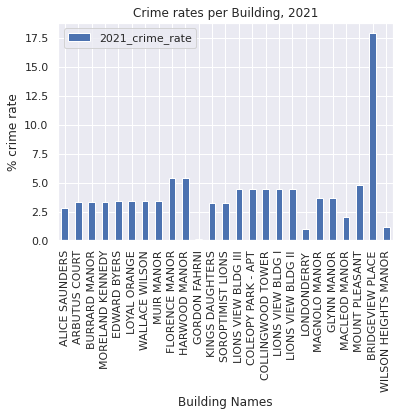

In [258]:
plt.figure(figsize=(10,5))
bldg_neigh_crime.plot(kind='bar');
plt.ylabel('% crime rate')
plt.title('Crime rates per Building, 2021');
# high crime rates in Bridgeview Place neighbourhood
# lowest in Gordon Fahrni neighbourhood

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ed0a2ac-4145-4dd5-b1d7-ad53322853db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>